# Multiple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
# If the observations are in a dataframe, you can use statsmodels.formulas.api to do the regression instead
from statsmodels import regression
import matplotlib.pyplot as plt

In [3]:
Y = np.array([1,3.5,4,8,12])
Y_hat = np.array([1,3,5,7,9])

print('Error ' + str(Y_hat-Y))

SE = (Y_hat-Y) ** 2

print('Squared Error ' + str(SE))
print('Sum Squared Error ' + str(np.sum(SE)))

Error [ 0.  -0.5  1.  -1.  -3. ]
Squared Error [0.   0.25 1.   1.   9.  ]
Sum Squared Error 11.25


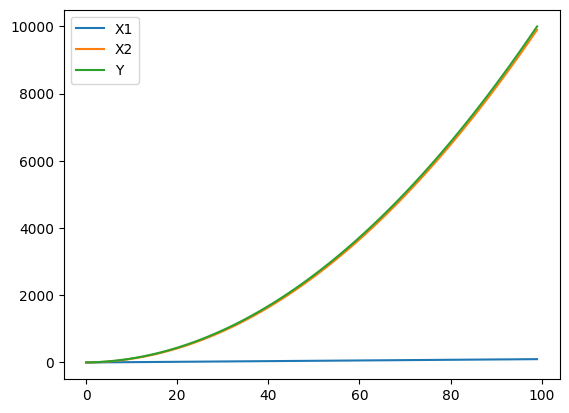

In [4]:
X1 = np.arange(100)

X2 = np.array([i**2 for i in range(100)])+ X1

Y = X1+X2

plt.plot(X1,label = 'X1')
plt.plot(X2, label= 'X2')
plt.plot(Y, label='Y')
plt.legend();

In [7]:
X = sm.add_constant(np.column_stack((X1,X2)))

results = regression.linear_model.OLS(Y,X).fit()

print(f'Beta_0: {results.params[0]}')
print(f'Beta_1: {results.params[1]}')
print(f'Beta_2: {results.params[2]}')


Beta_0: -1.1368683772161603e-13
Beta_1: 1.0000000000004796
Beta_2: 0.999999999999994


In [12]:
import yfinance as yf 

start= '2014-01-01'
end = '2015-01-01'

asset1 = yf.download('AAPL', start=start,end=end,auto_adjust=True)['Close']['AAPL']
asset2 = yf.download('TSLA', start=start,end=end,auto_adjust=True)['Close']['TSLA']
benchmark = yf.download('SPY', start=start,end=end,auto_adjust=True)['Close']['SPY']


slr  = regression.linear_model.OLS(asset1,sm.add_constant(asset2)).fit()
print(f'SLR beta of asset2: {slr.params[1]}')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SLR beta of asset2: 0.8393275038776538



C:\Users\USER\AppData\Local\Temp\ipykernel_12988\4200446405.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'SLR beta of asset2: {slr.params[1]}')


In [15]:
# Run multiple linear regression using asset2 and SPY as independent variables

mlr = regression.linear_model.OLS(asset1,sm.add_constant(np.column_stack((asset2,benchmark)))).fit()

prediction = mlr.params[0] + mlr.params[1]*asset2 + mlr.params[2] * benchmark
prediction.name = 'Prediction'

print(f'MLR beta of asset2: {mlr.params[1]} \nMLR beta of S&P 500: {mlr.params[2]}')

MLR beta of asset2: -0.08829872154510367 
MLR beta of S&P 500: 0.40910396981841324


C:\Users\USER\AppData\Local\Temp\ipykernel_12988\1538030785.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = mlr.params[0] + mlr.params[1]*asset2 + mlr.params[2] * benchmark
C:\Users\USER\AppData\Local\Temp\ipykernel_12988\1538030785.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'MLR beta of asset2: {mlr.params[1]} \nMLR beta of S&P 500: {mlr.params[2]}')


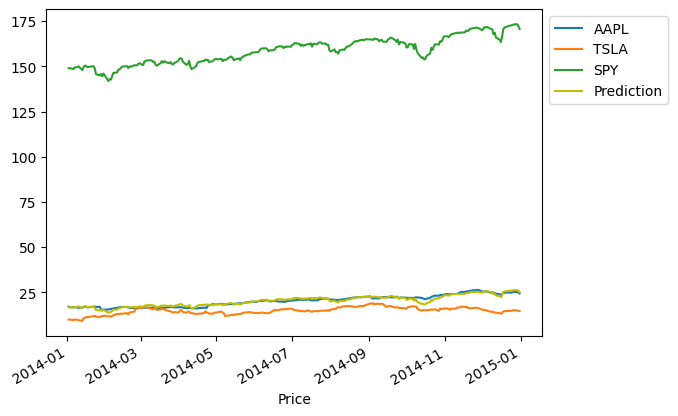

In [16]:
# Plot the three variables along with the prediction given by the MLR
asset1.plot()
asset2.plot()
benchmark.plot()
prediction.plot(color='y')
plt.xlabel('Price')
plt.legend(bbox_to_anchor=(1,1), loc=2);

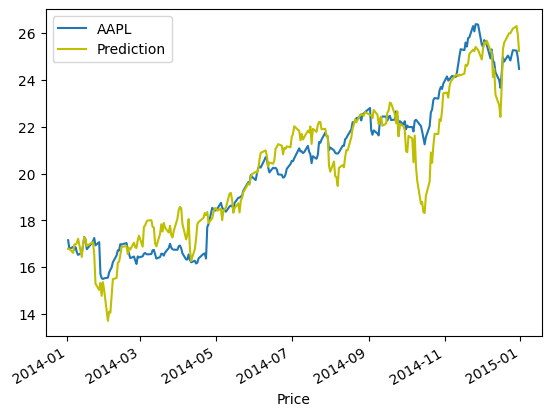

In [17]:
# Plot only the dependent variable and the prediction to get a closer look
asset1.plot()
prediction.plot(color='y')
plt.xlabel('Price')
plt.legend();

# Evaluation

In [18]:

mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1149.
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          1.80e-126
Time:                        14:27:05   Log-Likelihood:                -345.81
No. Observations:                 252   AIC:                             697.6
Df Residuals:                     249   BIC:                             708.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.2812      1.372    -31.555      0.000     -45.983     -40.580
x1            -0.0883      0.039     -2.271      0.024      -0.165      -0.012
x2             0.4091      0.010     39.588      0.000       0.389       0.429
==============================================================================
Omnibus:                       25.560   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.206
Skew:                           0.746   Prob(JB):                     1.67e-07
Kurtosis:                       3.862   Cond. No.                     3.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Selection Example


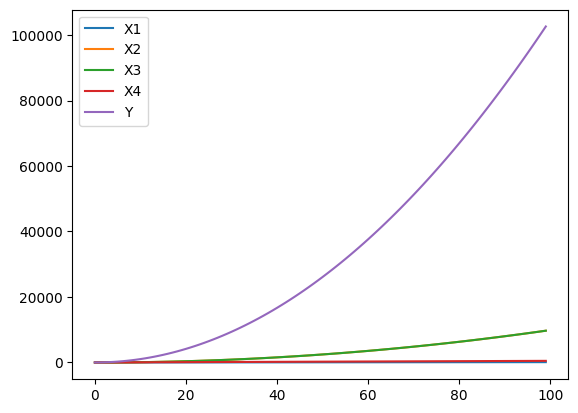

In [19]:
X1 = np.arange(100)
X2 = [i**2 for i in range(100)] - X1
X3 = [np.log(i) for i in range(1, 101)] + X2
X4 = 5 * X1
Y = 2 * X1 + 0.5 * X2 + 10 * X3 + X4

plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
plt.plot(X3, label='X3')
plt.plot(X4, label='X4')
plt.plot(Y, label='Y')
plt.legend();

In [20]:
results = regression.linear_model.OLS(Y, sm.add_constant(np.column_stack((X1,X2,X3,X4)))).fit()

print(f"Beta_0: {results.params[0]}")
print(f"Beta_1: {results.params[1]}")
print(f"Beta_2: {results.params[2]}")
print(f"Beta_3: {results.params[3]}")
print(f"Beta_4: {results.params[4]}")


Beta_0: 0.0
Beta_1: 0.26923076923068656
Beta_2: 0.49999999999886313
Beta_3: 10.000000000001819
Beta_4: 1.346153846153797


In [26]:
data = pd.DataFrame(np.column_stack((X1,X2,X3,X4)), columns = ['X1','X2','X3','X4'])
response = pd.Series(Y, name='Y')

In [27]:
def forward_aic(response,data):

    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]),name = "intercept") # 행의 개수 만큼 1 세팅
    current_score, best_new_score = np.inf,np.inf

    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) !=0:

        scores_with_elements = []
        count = 0

        # For each explanatory variable
        for element in explanatory:
            tmp = pd.concat([selected,data[element]],axis=1)

            result = regression.linear_model.OLS(Y,tmp).fit()
            score = result.aic
            scores_with_elements.append((score,element,count))
            count+=1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse=True)
        best_new_score,best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            explanatory.pop(index)
            selected = pd.concat([selected,data[best_element]],axis=1)
            current_score = best_new_score
        
    # Return the final model
    model = regression.linear_model.OLS(Y,selected).fit()
    return model


In [28]:
result = forward_aic(Y,data)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.563e+26
Date:                Tue, 13 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:40:37   Log-Likelihood:                 1691.3
No. Observations:                 100   AIC:                            -3375.
Df Residuals:                      96   BIC:                            -3364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.366e-11    7.7e-09      0.006      0.995   -1.52e-08    1.53e-08
X3            10.0000   4.66e-09   2.15e+09      0.000      10.000      10.000
X4             1.3462   7.12e-11   1.89e+10      0.000       1.346       1.346
X2             0.5000   4.66e-09   1.07e+08      0.000       0.500       0.500
X1             0.2692   1.42e-11   1.89e+10      0.000       0.269       0.269
==============================================================================
Omnibus:                       14.010   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.018
Skew:                          -0.650   Prob(JB):                      0.00668
Kurtosis:                       2.156   Cond. No.                     4.97e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""